# Data analyse multitasking 

In deze notebook staat de analyse van de data voor het experiment Multitasking. 

In [1]:
# importeer de benodigde libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np
import warnings
warnings.filterwarnings("ignore")
plt.style.use('default')
plt.style.use('ggplot') 

In [2]:
# open de dataset met behulp van Pandas 
df = pd.read_csv("data_multitasking.csv", sep=";")

In [3]:
df.head()

,Naam,ID,Leeftijd,Geslacht,Extra,Score_tetris1,Score_tetris2,Verhaal_1,verhaal_2
0,aleyna,7210691,22,vrouw,NaN,0,400,5,7
1,alperen,7210709,21,man,NaN,1800,1600,3,4
2,amaryllislee,7212147,22,vrouw,NaN,2400,5000,6,4
3,Amira,7216715,20,vrouw,"ADHD, dyslexie",1200,800,5,3
4,bella,7216811,20,vrouw,NaN,2200,1200,6,7


## Beschrijvende statstiek 
Het analyse staat opgesplits in twee onderdelen, namelijk de beschrijvende en toetsende statsiek. 

In [4]:
df_sta = df[["Leeftijd", "Geslacht", "Extra", "Score_tetris1", "Score_tetris2", "Verhaal_1", "verhaal_2"]]
df_sta = df_sta.rename(columns={"Score_tetris1": "Signal_task_tetris", "Score_tetris2": "Multitask_tetris", "Verhaal_1":"Signal_task_verhaal", "verhaal_2":"Multitask_verhaal"})

In [5]:
df_sta.describe(include="all")

,Leeftijd,Geslacht,Extra,Signal_task_tetris,Multitask_tetris,Signal_task_verhaal,Multitask_verhaal
count,21.000000,21,4,21.000000,21.000000,21.000000,21.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN
top,NaN,vrouw,ADHD,NaN,NaN,NaN,NaN
freq,NaN,12,2,NaN,NaN,NaN,NaN
mean,21.809524,NaN,NaN,1990.476190,1542.857143,5.952381,3.904762
std,2.293884,NaN,NaN,2986.286115,1581.319521,1.564487,2.211442
min,20.000000,NaN,NaN,0.000000,0.000000,3.000000,0.000000
25%,20.000000,NaN,NaN,800.000000,400.000000,5.000000,2.000000
50%,21.000000,NaN,NaN,1200.000000,800.000000,6.000000,4.000000
75%,22.000000,NaN,NaN,2200.000000,2000.000000,7.000000,6.000000


<AxesSubplot: xlabel='Multitask_verhaal', ylabel='Multitask_tetris'>

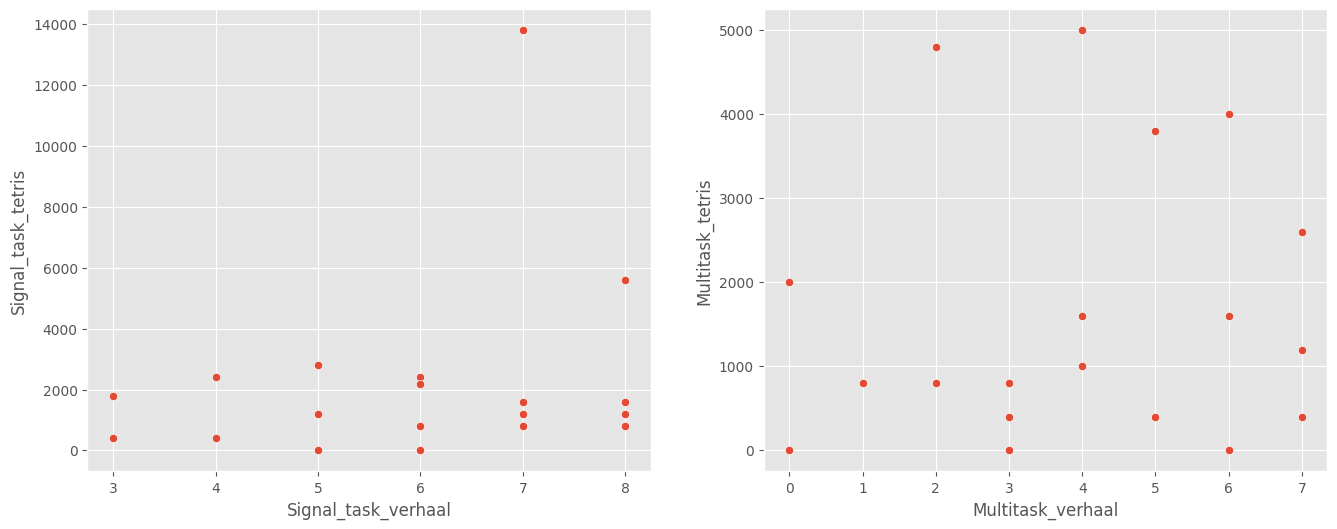

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

sns.scatterplot(y='Signal_task_tetris', x='Signal_task_verhaal', data=df_sta, ax=ax1) 
sns.scatterplot(y='Multitask_tetris', x='Multitask_verhaal',  data=df_sta, ax=ax2) 

# Per gesclacht 

Bereken de gemiddelde, standaad div, max en min voor elk variable. 

In [7]:
df_sta.groupby("Geslacht").agg(["mean", "std", "min", "max"])

Leeftijd                   Signal_task_tetris                   \
               mean       std min max               mean          std min   
Geslacht                                                                    
man       21.000000  1.322876  20  24        2711.111111  4235.694879   0   
vrouw     22.416667  2.712206  20  29        1450.000000  1556.511250   0   

                Multitask_tetris                         Signal_task_verhaal  \
            max             mean          std  min   max                mean   
Geslacht                                                                       
man       13800      2466.666667  1424.780685  800  4800            6.111111   
vrouw      5600       850.000000  1359.478510    0  5000            5.833333   

                           Multitask_verhaal                    
               std min max              mean       std min max  
Geslacht                                                        
man       1.763834   3   8          4.000000  2.291288   0   7  
vrouw     1.466804   3   8          3.833333  2.249579   0   7

<AxesSubplot: xlabel='Multitask_verhaal', ylabel='Multitask_tetris'>

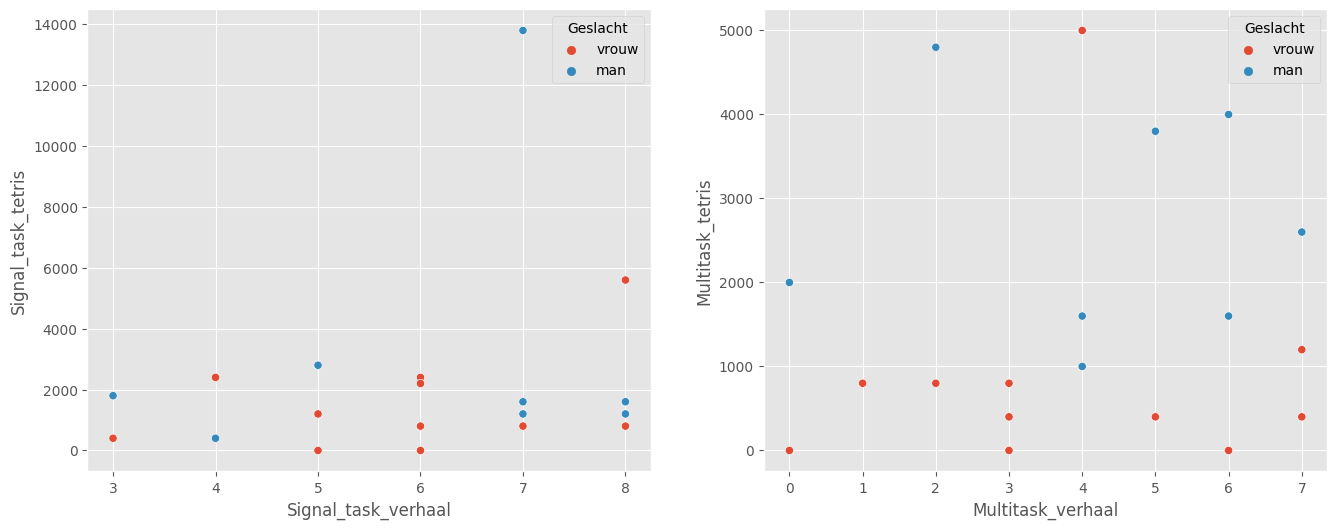

In [8]:
# laat de verspreiding van de data zien aan de hand van het geslacht 

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.scatterplot(y='Signal_task_tetris', x='Signal_task_verhaal', hue='Geslacht',data=df_sta, ax=ax1) 
sns.scatterplot(y='Multitask_tetris', x='Multitask_verhaal', hue='Geslacht', data=df_sta, ax=ax2) 

man           AxesSubplot(0.1,0.15;0.363636x0.75)
vrouw    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

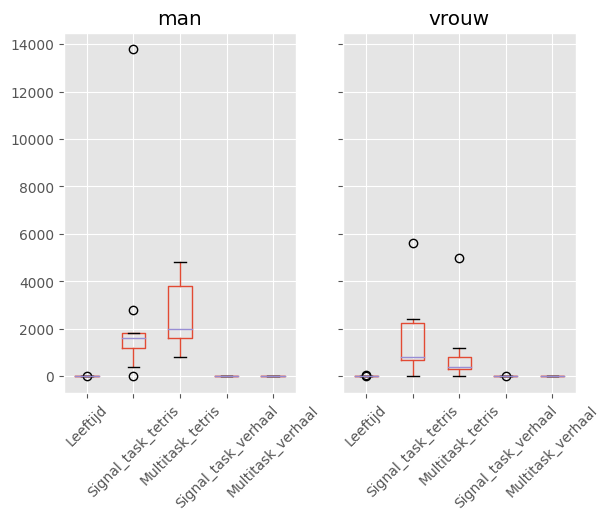

In [9]:
# Groepeer de data aan de hand van het geslacht
vr_gem = df_sta.groupby("Geslacht")
vr_gem.boxplot(rot=45, fontsize=10)

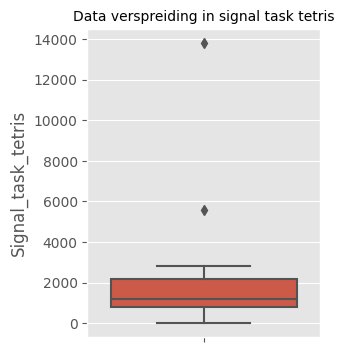

In [10]:
# Zoom in de uitschieters voor het kolom score tetris 1 
plt.figure(figsize=(3,4))
plt.title("Data verspreiding in signal task tetris", fontsize=10)
ax = sns.boxplot(y="Signal_task_tetris",  data=df_sta)


<AxesSubplot: xlabel='Geslacht', ylabel='Signal_task_tetris'>

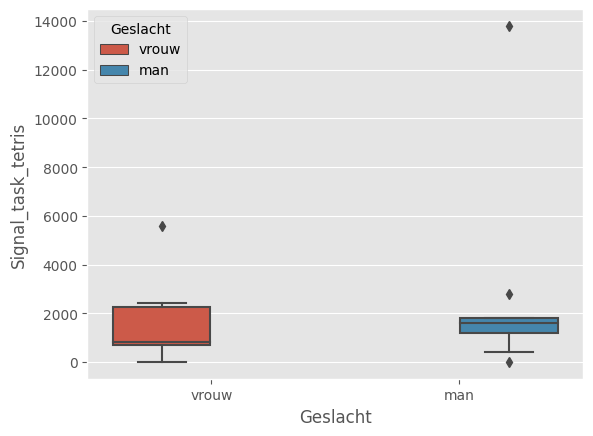

In [11]:
# per geslacht
sns.boxplot(y="Signal_task_tetris", x = "Geslacht", hue="Geslacht", data=df_sta)

In [12]:
# bereken en verwijder uitschieters
df_sta = df_sta[df_sta["Signal_task_tetris"]< df_sta["Signal_task_tetris"].quantile(0.99)]

<AxesSubplot: xlabel='Geslacht', ylabel='Signal_task_tetris'>

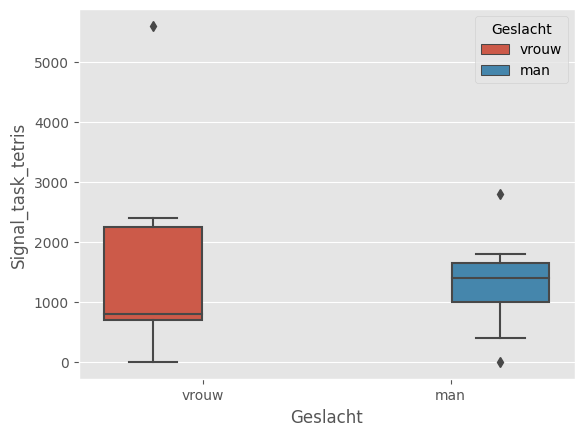

In [13]:
sns.boxplot(y="Signal_task_tetris", x = "Geslacht", hue="Geslacht", data=df_sta)

We zien dat de uitschieters nu weg zijn. Nu kunnen we de grafieken opnieuw plotten. 

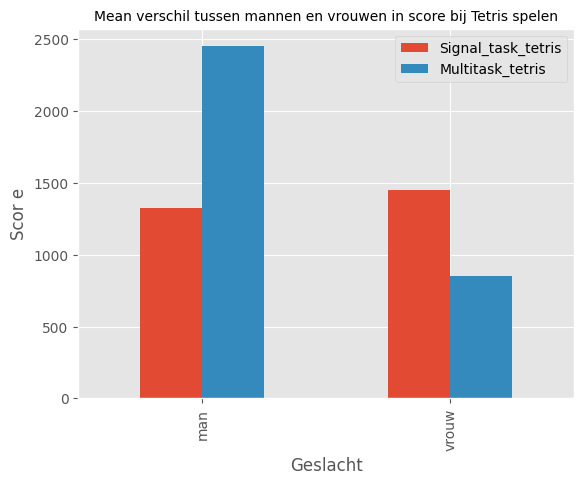

In [14]:
df_sta[["Signal_task_tetris", "Multitask_tetris", "Geslacht"]].groupby("Geslacht").mean().plot.bar()
plt.title("Mean verschil tussen mannen en vrouwen in score bij Tetris spelen", fontsize=10)
plt.ylabel('Scor e') 

plt.show()

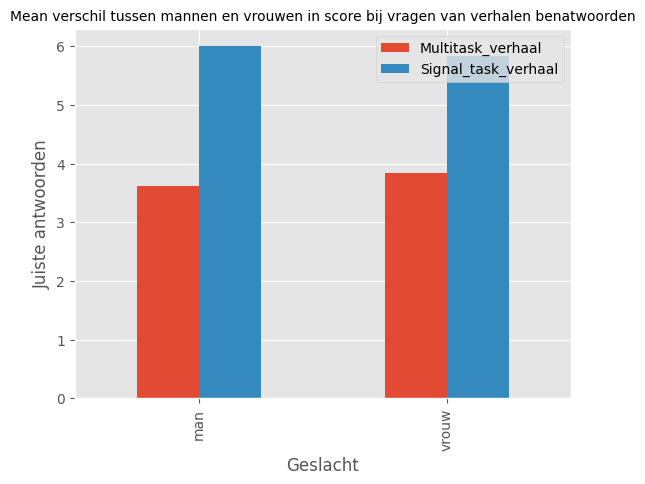

In [15]:
df_sta[["Multitask_verhaal", "Signal_task_verhaal", "Geslacht"]].groupby("Geslacht").mean().plot.bar()
plt.title("Mean verschil tussen mannen en vrouwen in score bij vragen van verhalen benatwoorden", fontsize=10)
plt.ylabel('Juiste antwoorden') 
plt.show()

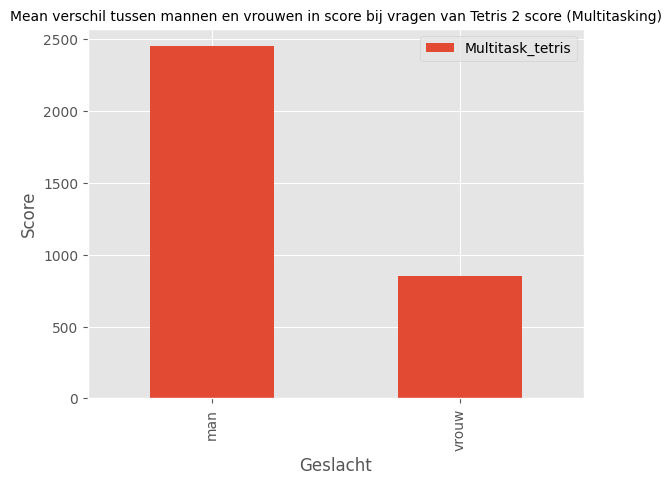

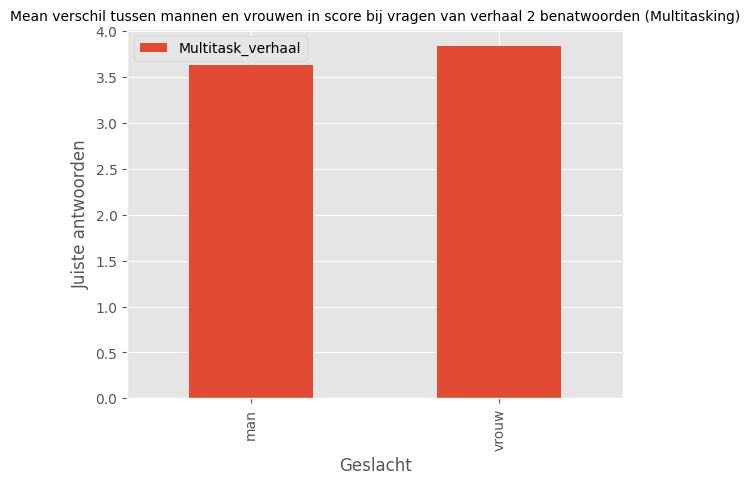

In [16]:
df_sta[["Multitask_tetris", "Geslacht"]].groupby("Geslacht").mean().plot.bar()
plt.title("Mean verschil tussen mannen en vrouwen in score bij vragen van Tetris 2 score (Multitasking)", fontsize=10)
plt.ylabel('Score') 
df_sta[["Multitask_verhaal", "Geslacht"]].groupby("Geslacht").mean().plot.bar()
plt.title("Mean verschil tussen mannen en vrouwen in score bij vragen van verhaal 2 benatwoorden (Multitasking)", fontsize=10)
plt.ylabel('Juiste antwoorden') 
plt.show()

In [17]:
df_sta.describe(include="all")

,Leeftijd,Geslacht,Extra,Signal_task_tetris,Multitask_tetris,Signal_task_verhaal,Multitask_verhaal
count,20.000000,20,4,20.00000,20.000000,20.000000,20.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN
top,NaN,vrouw,ADHD,NaN,NaN,NaN,NaN
freq,NaN,12,2,NaN,NaN,NaN,NaN
mean,21.850000,NaN,NaN,1400.00000,1490.000000,5.900000,3.750000
std,2.345769,NaN,NaN,1296.14814,1603.253272,1.586124,2.149051
min,20.000000,NaN,NaN,0.00000,0.000000,3.000000,0.000000
25%,20.000000,NaN,NaN,700.00000,400.000000,5.000000,2.000000
50%,21.000000,NaN,NaN,1200.00000,800.000000,6.000000,4.000000
75%,22.000000,NaN,NaN,1900.00000,1700.000000,7.000000,5.250000


## Inductive statsiek
Bereken correlatie. 

In [18]:
df_sta.corr()

,Leeftijd,Signal_task_tetris,Multitask_tetris,Signal_task_verhaal,Multitask_verhaal
Leeftijd,1.000000,-0.020772,-0.206140,-0.273012,0.033931
Signal_task_tetris,-0.020772,1.000000,0.033432,0.220167,0.181391
Multitask_tetris,-0.206140,0.033432,1.000000,0.322459,0.055756
Signal_task_verhaal,-0.273012,0.220167,0.322459,1.000000,0.054042
Multitask_verhaal,0.033931,0.181391,0.055756,0.054042,1.000000


<AxesSubplot: >

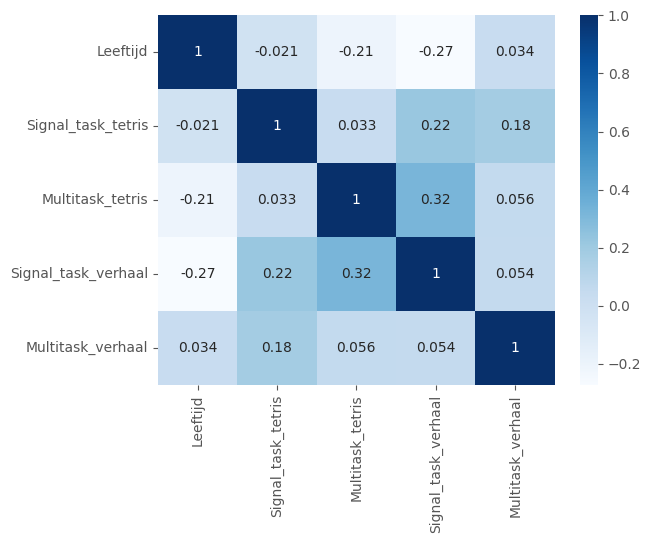

In [19]:
sns.heatmap(df_sta.corr(), cmap="Blues", annot=True)

In [20]:
df_sta.groupby("Geslacht").agg(["mean", "std", "min", "max"])

Leeftijd                   Signal_task_tetris                   \
               mean       std min max               mean          std min   
Geslacht                                                                    
man       21.000000  1.414214  20  24             1325.0   861.477137   0   
vrouw     22.416667  2.712206  20  29             1450.0  1556.511250   0   

               Multitask_tetris                         Signal_task_verhaal  \
           max             mean          std  min   max                mean   
Geslacht                                                                      
man       2800           2450.0  1522.216429  800  4800            6.000000   
vrouw     5600            850.0  1359.478510    0  5000            5.833333   

                           Multitask_verhaal                    
               std min max              mean       std min max  
Geslacht                                                        
man       1.851640   3   8          3.625000  2.133910   0   6  
vrouw     1.466804   3   8          3.833333  2.249579   0   7

## T-test

Indenpentent sample (Welch's t-test)

## Hypothese formuleren(H0, Ha)
H1 is: De gemidelde score van het uitvoeren van beide taken teglijk (multitasking) van mannen > dan vrouwen

H0 is: Er is geen verschill in de gemiddelde socre van het uitvoeren van beide taken tegelijk (multitasking)

In [21]:
# H1 is hier correct 
scipy.stats.ttest_ind(*df_sta.groupby('Geslacht')['Multitask_verhaal'].apply(lambda x:x.values), equal_var=False)

Ttest_indResult(statistic=-0.20928633274355032, pvalue=0.8369122736248811)

In [22]:
# H0 is hier correct
scipy.stats.ttest_ind(*df_sta.groupby('Geslacht')['Multitask_tetris'].apply(lambda x:x.values), equal_var=False)

Ttest_indResult(statistic=2.4021261987402625, pvalue=0.030834733075928156)